
---

In 1962, J.L. Sersic empirically derived a functional form for the way the light is spread out across a galaxy. This is called the [Sersic surface brightness profile](http://ned.ipac.caltech.edu/level5/March05/Graham/Graham2.html). The Sersic index <i>n</i> determines how steeply the light intensity drops off away from a galaxy's center, and different values of <i>n</i> describe different galaxy populations. An index of <i>n=4</i> for example (a.k.a. de Vancouleurs profile), well describes giant elliptical galaxies, whereas smaller star forming spiral galaxies like the Milky Way are best described with an exponential profile, <i>n=1</i>. 

Coming soon to Astropy are the Sersic1D and Sersic2D model classes. This is my first substantial code contribution to the project and I hope it proves useful to the astronomy community. This was also a great stepping stone to developing more complex functionality as I move forward with implementing bounding boxes and fast image rasterization. 

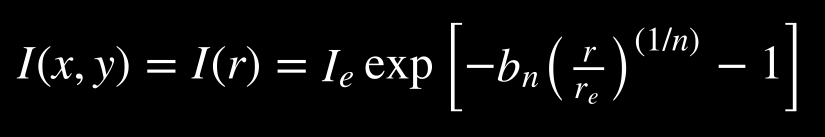

In [1]:
from IPython.display import Image
Image(filename="sersic_eqn.jpg",width=500) 

---

In [2]:
import os 
os.chdir('/Users/Patti/gsoc/astropy/')

In [3]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import Sersic1D,Sersic2D
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

import seaborn as sns
sns.set_context('poster')
sns.set_style('white',{'grid':False})

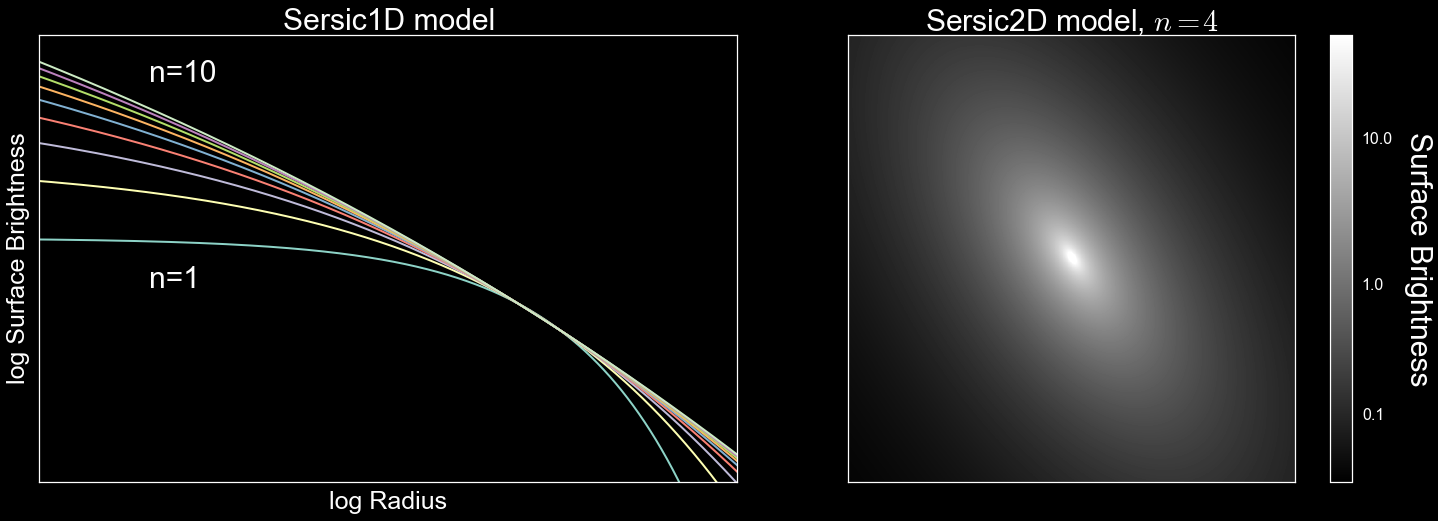

In [4]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(25,8))
    plt.subplots_adjust(wspace=0)
    plt.subplot(121,xscale='log',yscale='log')
    s1 = Sersic1D(amplitude = 1, r_eff = 5)
    r=np.arange(0,100,.01)
    for n in range(1,10):
        s1.n = n 
        plt.plot(r,s1(r),alpha=1,lw=2)


    yl=plt.ylim(1e-2,1e3)
    yl=plt.xlim(1e-1,30)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('log Surface Brightness',fontsize=25)
    plt.xlabel('log Radius',fontsize=25)
    t=plt.text(.25,1.5,'n=1',fontsize = 30)
    t=plt.text(.25,300,'n=10',fontsize = 30)
    plt.title('Sersic1D model',fontsize=30)

    amplitude=1.
    r_eff=25.
    n=4.
    x_0 = 50.
    y_0 = 50.
    ellip = .5
    theta = -1.

    x,y = np.meshgrid(np.arange(1000),np.arange(1000))

    mod = Sersic2D(amplitude = 1, r_eff = 250, n=4, \
                 x_0=500, y_0=500, ellip=.5,theta=-1)

    img = mod(x,y)

    norm = ImageNormalize(vmin=1e-2,vmax=50,stretch=LogStretch())
    
    plt.subplot(122)
    plt.imshow(img,origin='lower',interpolation='nearest',cmap='binary_r',norm=norm)
    plt.xticks([])
    plt.yticks([])
    cbar=plt.colorbar()
    cbar.set_label('Surface Brightness',rotation=270,labelpad=40,fontsize=30)
    cbar.set_ticks([.1,1,10],update_ticks=True)
    plt.title('Sersic2D model, $n=4$',fontsize=30)
    plt.show()

---